In [1]:
import pandas as pd

america_df=pd.read_csv('/home/sr933/rcc/data/predicted_prob_american.csv')
y_test=america_df['True']
y_pred_prob=america_df['Predicted']

lithuania_df=pd.read_csv('/home/sr933/rcc/data/predicted_prob_lithuanian.csv')
y_test_lithuania=lithuania_df['True']
y_pred_prob_lithuania=lithuania_df['Predicted']

metastasis_df=pd.read_csv('/home/sr933/rcc/data/predicted_prob_metastasis.csv')
y_test_metastasis=metastasis_df['True']
y_pred_prob_metastasis=metastasis_df['Predicted']

china_df=pd.read_csv('/home/sr933/rcc/data/predicted_prob_china.csv')
y_test_china=china_df['True']
y_pred_prob_china=china_df['Predicted']

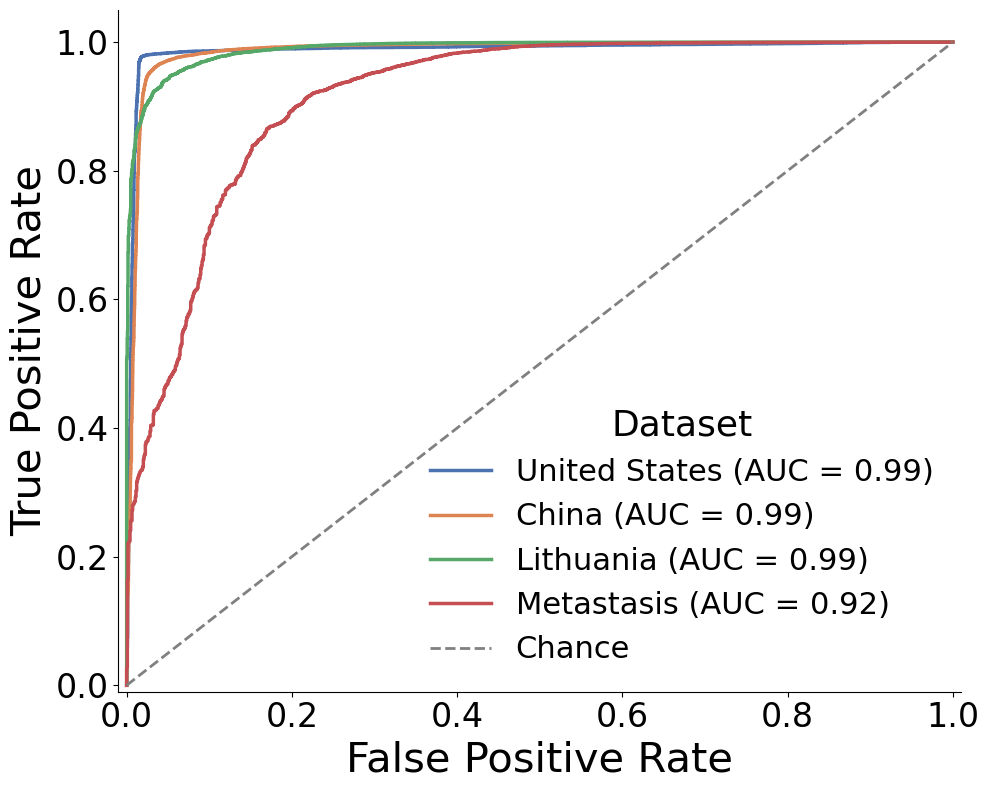

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Use a refined color palette
colors = sns.color_palette("deep")

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Dictionary to hold dataset names and their data
datasets = {
    "United States": (y_test, y_pred_prob),
    "China": (y_test_china, y_pred_prob_china),
    "Lithuania": (y_test_lithuania, y_pred_prob_lithuania),
    "Metastasis": (y_test_metastasis, y_pred_prob_metastasis)
}

# Plot each ROC curve
for i, (label, (y_true, y_score)) in enumerate(datasets.items()):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr,
            color=colors[i],
            lw=2.5,
            label=f"{label} (AUC = {roc_auc:.2f})")

# Chance line
ax.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Chance')

# Axis labels
ax.set_xlabel("False Positive Rate", fontsize=30)
ax.set_ylabel("True Positive Rate", fontsize=30)

# Axis limits
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.05])

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=24)

# Remove top and right spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Add legend
ax.legend(loc="lower right", fontsize=22, title="Dataset", title_fontsize=26, frameon=False)

# Adjust layout
plt.tight_layout()
# Save the figure
plt.savefig('/home/sr933/output/roc_curve_feature.png', dpi=900, bbox_inches='tight')

# Show the plot
plt.show()


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Function to calculate metrics
def evaluate_model(y_true, y_pred_prob, threshold=0.5):
    y_pred = (y_pred_prob >= threshold).astype(int)  # Convert probabilities to binary predictions
    accuracy = round(accuracy_score(y_true, y_pred), 2)
    precision = round(precision_score(y_true, y_pred, zero_division=0), 2)
    recall = round(recall_score(y_true, y_pred), 2)
    f1 = round(f1_score(y_true, y_pred), 2)
    auc = round(roc_auc_score(y_true, y_pred_prob), 2)
    return [accuracy, precision, recall, f1, auc]

# Calculate metrics for each dataset
datasets = {
    "American": (y_test, y_pred_prob),
    "Chinese": (y_test_china, y_pred_prob_china),
    "Lithuanian": (y_test_lithuania, y_pred_prob_lithuania),
    "Metastasis": (y_test_metastasis, y_pred_prob_metastasis)
}

# Create a results dictionary
results = {name: evaluate_model(y_true, y_pred_prob) for name, (y_true, y_pred_prob) in datasets.items()}

# Convert results to a DataFrame for better visualization
metrics_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC"])

# Print the table
print(metrics_df)


            Accuracy  Precision  Recall  F1 Score   AUC
American        0.97       0.99    0.96      0.97  0.99
Chinese         0.97       0.99    0.98      0.98  0.99
Lithuanian      0.98       0.98    1.00      0.99  0.99
Metastasis      0.99       0.99    1.00      1.00  0.92
